In [1]:
import smash
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from smash.solver._mwd_cost import nse as cost_nse
from preprocessing import load_data, preprocess_visualize

smash.__version__

'0.2.4+57.g03953b1'

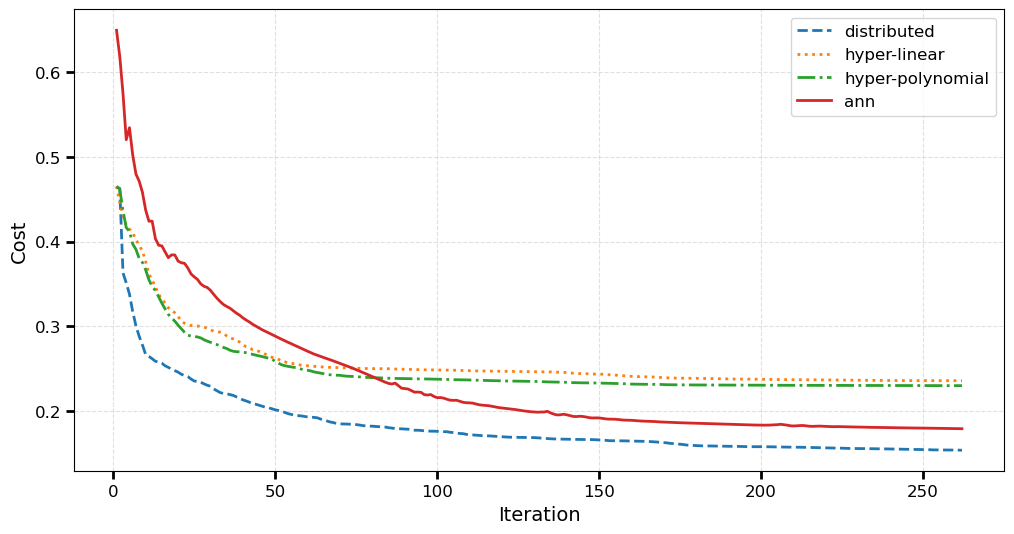

In [37]:
dir = "res/multisites_6/outterminal/"

mtds = ["distributed", "hyper-linear", "hyper-polynomial", "ann"]

x = range(1, 263)

# Define colors and line styles for each method
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
linestyles = ["--", ":", "-.", "-"]
line_kwargs = {"linewidth": 2}

fig, ax = plt.subplots(figsize=(12, 6))

for i, mtd in enumerate(mtds):
    if mtd == "ann":
        J = np.loadtxt(dir + mtd + ".txt", usecols=(5, 9))
    else:
        J = np.loadtxt(dir + mtd + ".txt", usecols=(8, 12))

    ax.plot(x, J[: len(x), 0], label=mtd, color=colors[i], linestyle=linestyles[i], **line_kwargs)

# Set x and y axis labels, title and legend
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
# ax.set_title("Multisites Optimization", fontsize=16, fontweight="bold")
ax.legend(fontsize=12)

# Customize tick labels and grid lines
ax.tick_params(axis="both", which="major", labelsize=12, width=2, length=6)
ax.tick_params(axis="both", which="minor", labelsize=10, width=1, length=4)
ax.grid(True, which="major", axis="both", linestyle="--", color="lightgray", alpha=0.7)

plt.show()



# Preprocessing:

In [2]:
res_dir = "res/local_unif/MedEst"

df_info = pd.read_csv("infoBV/MedEst/info_bv.csv")

/tmp/ipykernel_4011886/1250687208.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nse"] = nse


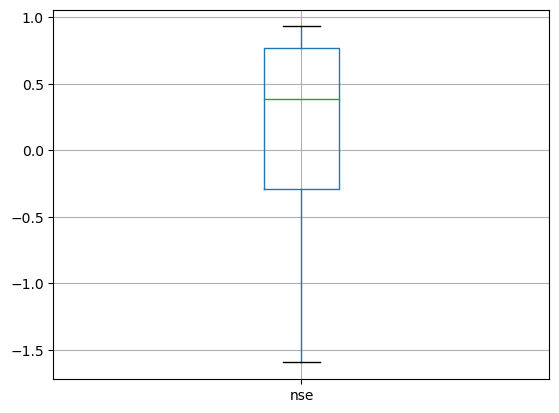

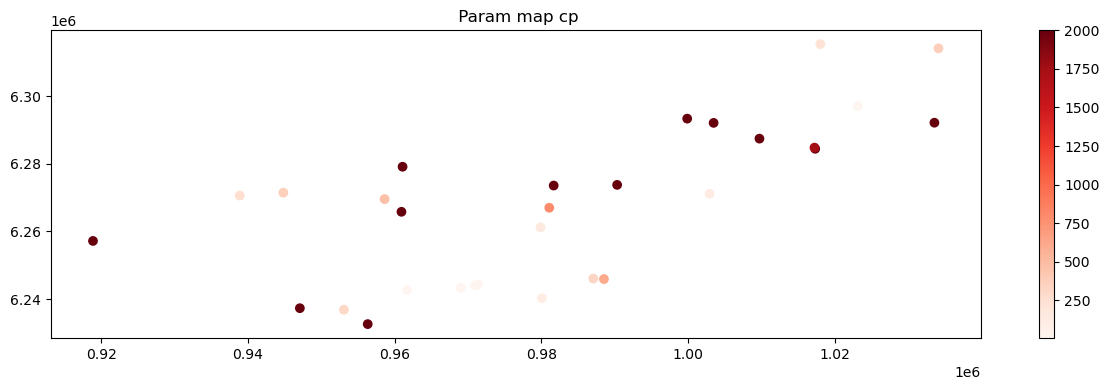

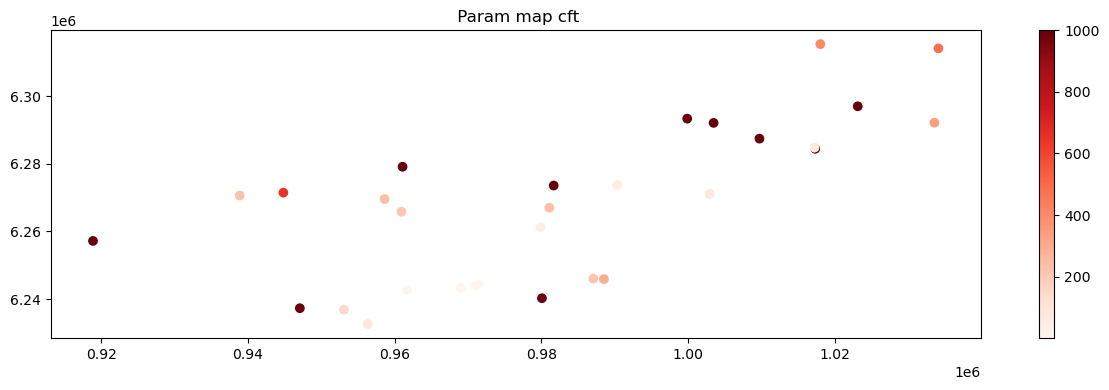

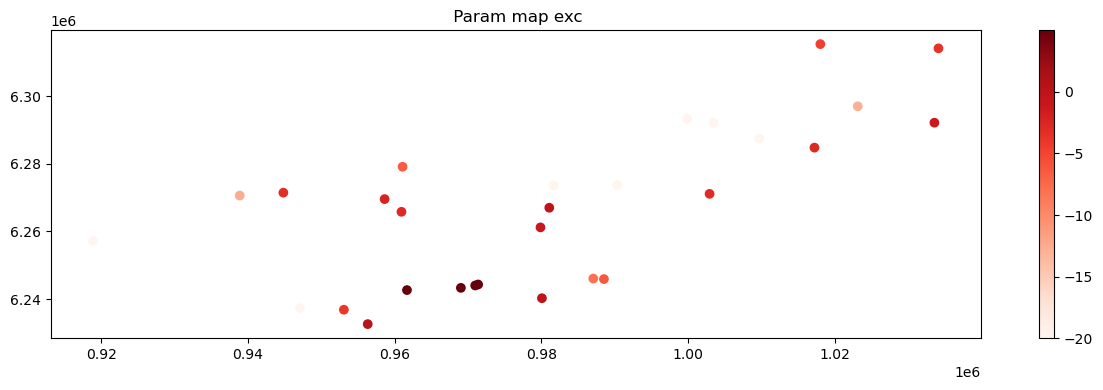

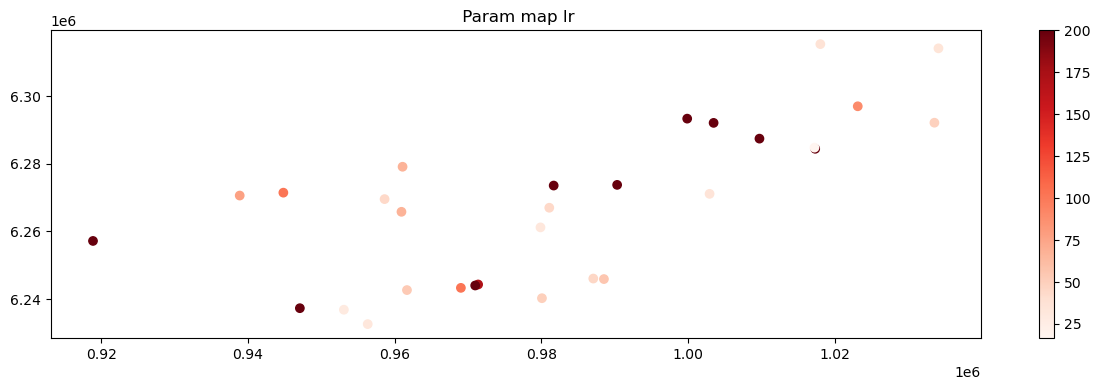

In [3]:
code = df_info.Code_BV.values

df = df_info[["Code_BV", "Xexu", "Yexu", "Surf_raster"]]

nse = []

param = {p: [] for p in ["cp", "cft", "exc", "lr"]}

for cod in code:

    res = smash.read_model_ddt(os.path.join(res_dir, cod + ".hdf5"))

    nse.append(1 - cost_nse(res["qobs"][0], res["qsim"][0]))

    for par in param.keys():

        param[par].append(res[par][np.where(res["active_cell"]==1)][0])

df["nse"] = nse

df[["nse"]].boxplot(showfliers=False)
plt.show()

### plot param ###
###            ###

for par in param.keys():

    plt.subplots(figsize=(15, 4))
    
    plt.scatter(df.Xexu, df.Yexu, c=param[par], cmap="Reds")
    plt.colorbar()

    plt.title(f" Param map {par}")
    plt.show()


In [4]:
df

,Code_BV,Xexu,Yexu,Surf_raster,nse
0,Y4624010,956312.5,6232662.5,532,0.502439
1,Y4604020,947062.5,6237362.5,187,-0.357025
2,Y4615020,953062.5,6236912.5,283,0.892975
3,Y4615610,961662.5,6242712.5,70,-0.023342
4,Y4615810,971362.5,6244362.5,10,-0.034504
5,Y4615830,969012.5,6243362.5,30,-0.090798
6,Y4616010,970962.5,6244062.5,7,-0.040068
7,Y4414015,918862.5,6257212.5,58,-0.440931
8,Y6434010,1034112.5,6314062.5,441,0.774173
9,Y6434005,1018012.5,6315312.5,262,0.789259


In [8]:
thres_nse = -0.2  # np.quantile(df["nse"].values, 0.12)

thres_surf = 10 # np.quantile(df["Surf_raster"].values, 0.09)

print(thres_nse, thres_surf)

df_filter = df[df.nse > thres_nse][df.Surf_raster > thres_surf]
df_filter.reset_index()

-0.2 10


/tmp/ipykernel_4011886/3614791881.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filter = df[df.nse > thres_nse][df.Surf_raster > thres_surf]


,index,Code_BV,Xexu,Yexu,Surf_raster,nse
0,0,Y4624010,956312.5,6232662.5,532,0.502439
1,2,Y4615020,953062.5,6236912.5,283,0.892975
2,3,Y4615610,961662.5,6242712.5,70,-0.023342
3,5,Y4615830,969012.5,6243362.5,30,-0.090798
4,8,Y6434010,1034112.5,6314062.5,441,0.774173
5,9,Y6434005,1018012.5,6315312.5,262,0.789259
6,10,Y5444010,988512.5,6245962.5,195,0.854005
7,11,Y5424010,987062.5,6246112.5,69,0.813200
8,12,Y5435010,980062.5,6240312.5,49,0.308031
9,13,Y5615030,1033562.5,6292112.5,291,0.465342


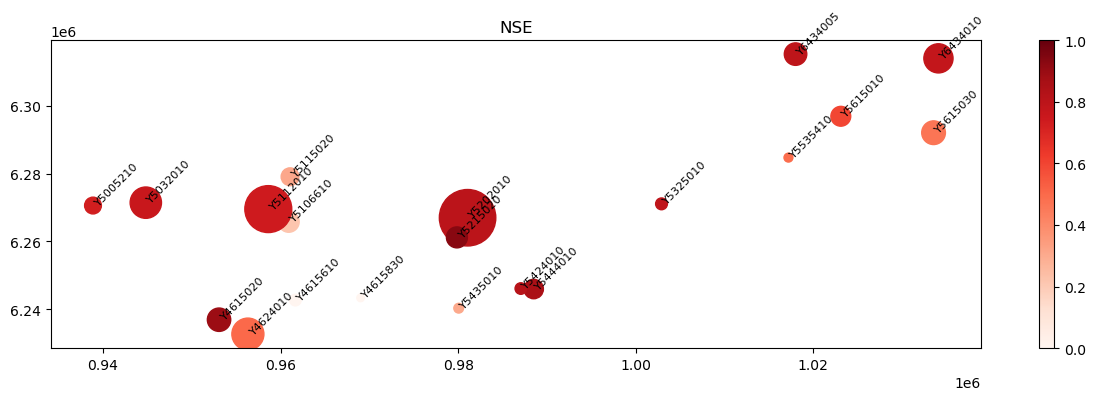

In [9]:
plt.subplots(figsize=(15, 4))

plt.scatter(df_filter.Xexu, df_filter.Yexu, c=df_filter.nse, s=df_filter.Surf_raster, cmap="Reds")
plt.colorbar()
plt.clim(0, 1)

for i, txt in enumerate(df_filter.Code_BV.values):
    plt.text(df_filter.iloc[i].Xexu, df_filter.iloc[i].Yexu, txt, fontsize=8, rotation=45)

plt.title("NSE")
plt.show()

In [12]:
dff = pd.read_csv("infoBV/MedEst/info_bv.csv")
dff = dff[dff.Code_BV.isin(df_filter.Code_BV.values)].reset_index()
dff.head()

,index,Unnamed: 0,Code_BV,Code_hyd,Code_hyd2,Surf_Bnbv,Surf_raster,Xexu,Yexu,stations_vfv2,...,Xexu_runoff,Yexu_runoff,code_karst,indice_karst,code_nival,indice_nival,code_Qbase,indice_Qbase,code_barrage,indice_barrage
0,0,1,Y4624010,MedEst_672,ME672,534.3175,532,956312.5,6232662.5,0,...,955500,6232500,2,0.456,4,0.008,4,32.203,4,0.002
1,2,3,Y4615020,MedEst_1234,ME1234,282.0925,283,953062.5,6236912.5,0,...,953500,6236500,3,0.194,4,0.007,4,33.779,4,0.004
2,3,4,Y4615610,MedEst_1243,ME1243,70.6700,70,961662.5,6242712.5,1,...,961500,6242500,4,0.000,4,0.010,4,30.208,4,0.016
3,5,6,Y4615830,MedEst_1239,ME1239,29.3550,30,969012.5,6243362.5,0,...,969500,6243500,4,0.000,4,0.011,4,23.087,4,0.000
4,8,9,Y6434010,MedEst_296,ME296,441.0025,441,1034112.5,6314062.5,0,...,1034500,6313500,2,0.202,4,0.057,4,20.545,4,0.000


In [ ]:
dff.to_csv("BV_MedEst", index=False)

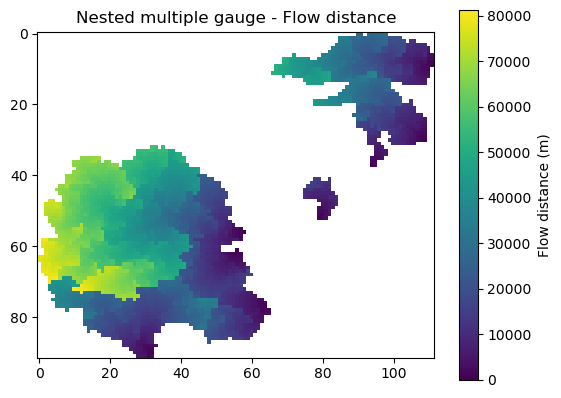

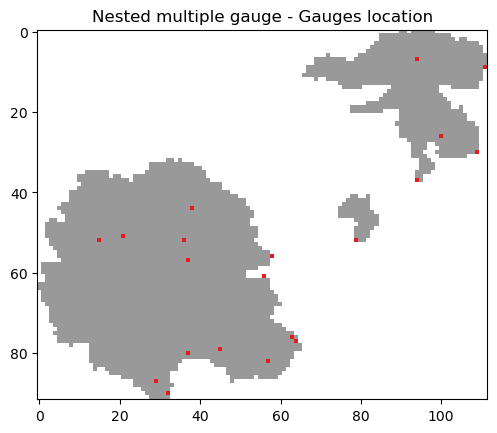

In [11]:
preprocess_visualize(*load_data(dff), descriptor_plot=False)

In [29]:
ValE = df_filter[df_filter.Xexu<1e6]["Code_BV"].to_list()
len(ValE)

16

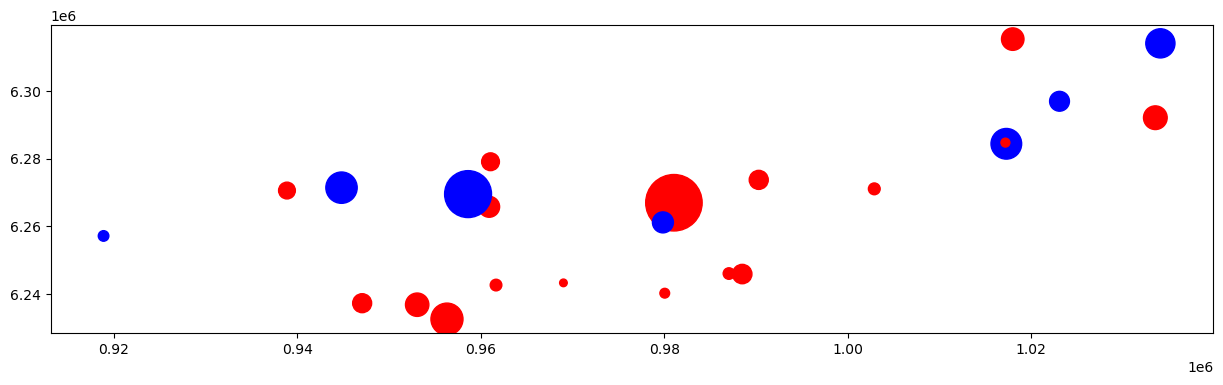

In [120]:
CalVal = df_filter["Code_BV"].to_list()
Cal = []
Val = []
color = []
for c in CalVal:
    if np.random.uniform()<0.3:
        Cal.append(c)
        color.append("blue")
    else:
        Val.append(c)
        color.append("red")

dfcalval = df[df.Code_BV.isin(CalVal)]

plt.subplots(figsize=(15, 4))

plt.scatter(dfcalval.Xexu, dfcalval.Yexu, s=dfcalval.Surf_raster, color=color)

plt.show()

In [64]:
code = Cal + Val # + ValE
mode = ["cal"] * len(Cal) + ["val"] * len(Val) # + ["valE"] * len(ValE)

pd.DataFrame({"Code_BV": code, "mode": mode}).to_csv("infoBV/MedEst/cal_val.csv", index=False)

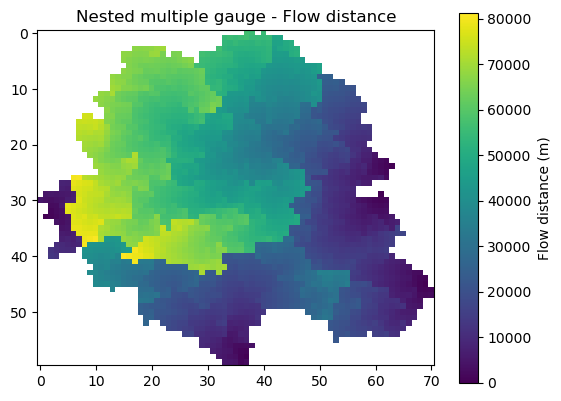

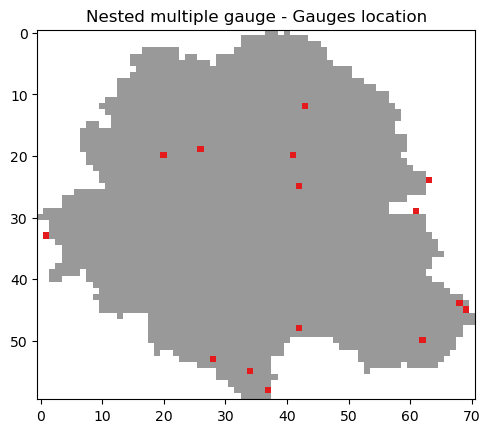

</> Reading daily interannual pet: 100%|██████████| 366/366 [00:00<00:00, 6439.67it/s]


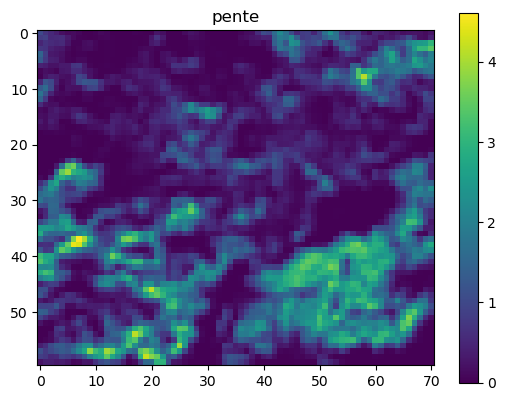

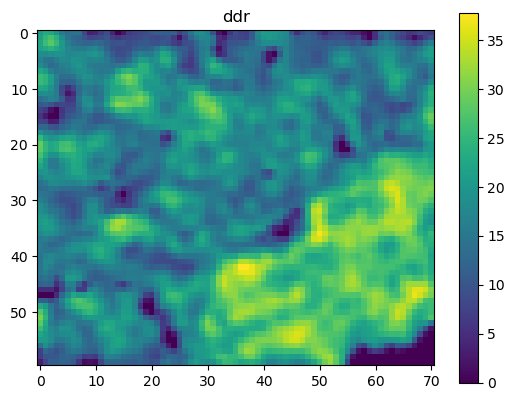

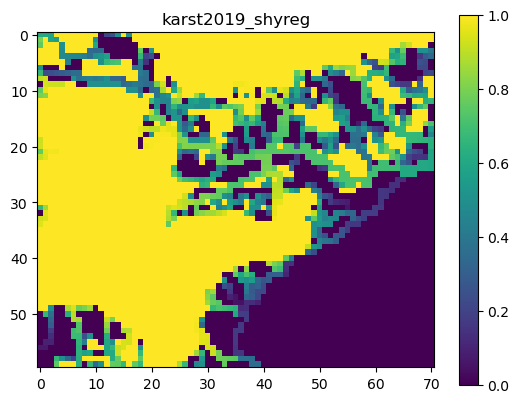

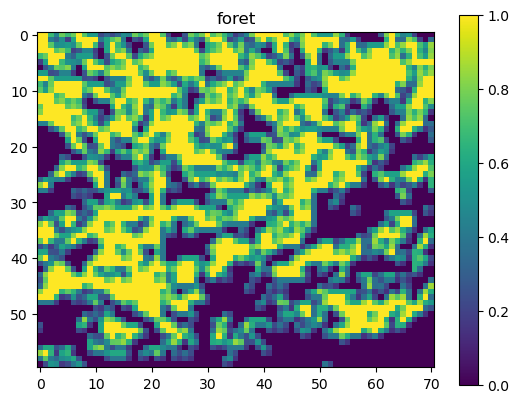

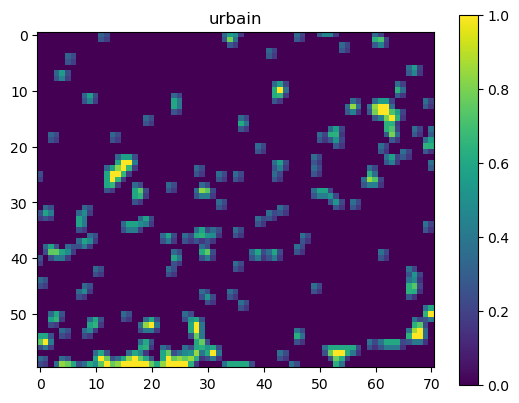

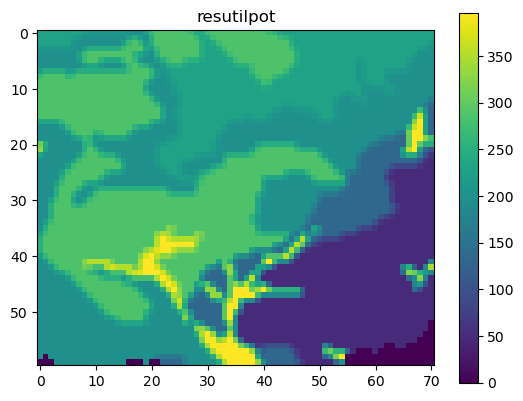

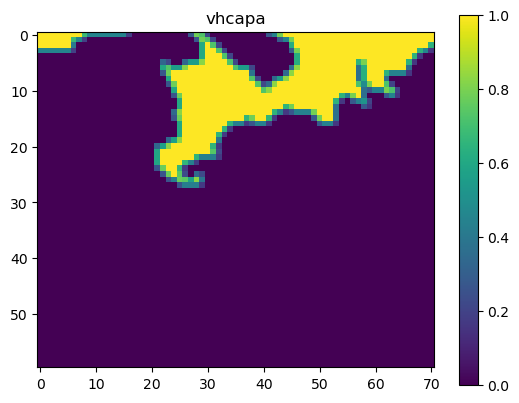

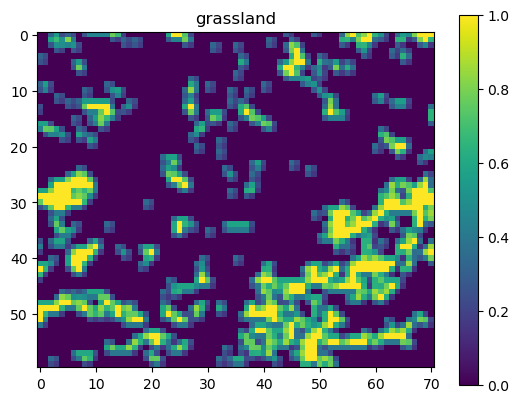

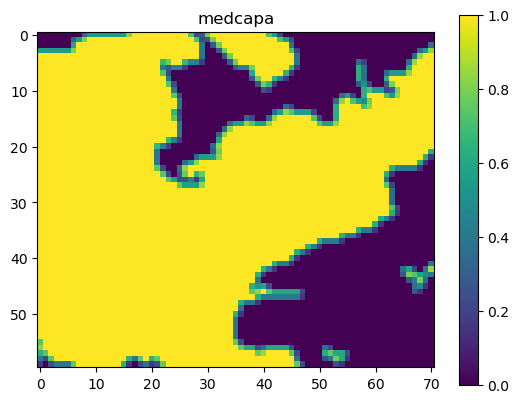

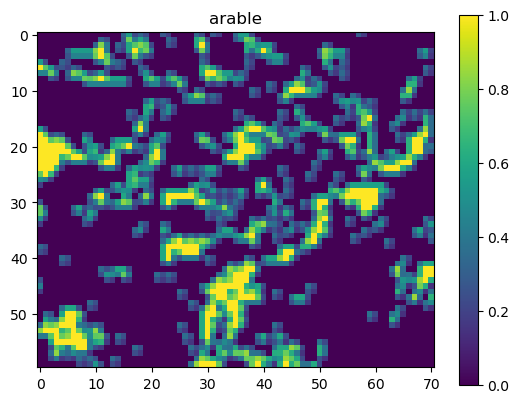

In [60]:
preprocess_visualize(*load_data(dff[dff.Xexu < 1e6]), descriptor_plot=True)

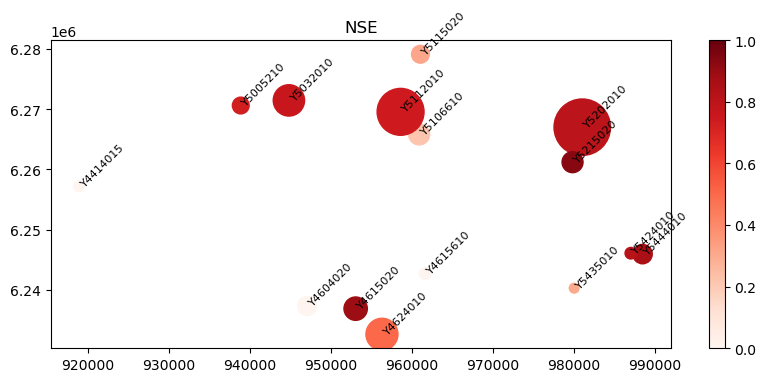

In [50]:
df_filter2 = df_filter[df_filter.Xexu < 1e6] # [df_filter.Xexu > 9.3e5]

plt.subplots(figsize=(10, 4))

plt.scatter(df_filter2.Xexu, df_filter2.Yexu, c=df_filter2.nse, s=df_filter2.Surf_raster, cmap="Reds")

for i, txt in enumerate(df_filter2.Code_BV.values):
    plt.text(df_filter2.iloc[i].Xexu, df_filter2.iloc[i].Yexu, txt, fontsize=8, rotation=45)

plt.colorbar()

plt.clim(0, 1)

plt.title("NSE")

plt.show()

In [26]:
cal_code = ["Y5005210", "Y5032010", "Y5112010", "Y5202010", "Y5444010", "Y5435010", "Y4615610", "Y4615020"]

In [27]:
val_code = ['Y4624010', 'Y4604020', 'Y4414015', 'Y5424010', 'Y5106610',
       'Y5115020', 'Y5215020']

In [57]:
mode = []
for i in range(len(df_filter2)):
    if df_filter2.iloc[i].Code_BV in cal_code:
        mode.append("cal")

    else:
        mode.append("val")

df_filter2["mode"] = mode

df_filter2[["Code_BV", "mode"]].to_csv("cal_val.csv", index=False)

/tmp/ipykernel_2830520/3804149728.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2["mode"] = mode


# Results:

In [16]:
dir = "res/multisites/"

In [17]:
methods = ["uniform", "hyper-linear", "hyper-polynomial", "distributed", "ann"]

models = [smash.read_model_ddt(os.path.join(dir, method + ".hdf5")) for method in methods]

In [18]:
models[0]["code"]

array(['Y4624010', 'Y4604020', 'Y4615020', 'Y4615610', 'Y4414015',
       'Y5444010', 'Y5424010', 'Y5435010', 'Y5005210', 'Y5032010',
       'Y5106610', 'Y5112010', 'Y5115020', 'Y5202010', 'Y5215020'],
      dtype='<U8')

In [ ]:
cal_code = ["Y5005210", "Y5032010", "Y5112010", "Y5202010", "Y5444010", "Y5435010", "Y4615610", "Y4615020"]
val_code = ['Y4624010', 'Y4604020', 'Y4414015', 'Y5424010', 'Y5106610',
       'Y5115020', 'Y5215020']

In [31]:
cost = []
metd = []

cal_val = []
code_catch = []

for i, code in enumerate(models[0]["code"]):

    for model, method in zip(models, methods):

        qo = model["qobs"][i]
        qs = model["qsim"][i]

        if code in cal_code:

            cal_val.append("Cal")

        elif code in val_code:

            cal_val.append("Val")

        # # elif code in val2:

        # #     cal_val.append("Val2") 

        else:
            continue
            
        cost.append(1 - cost_nse(qo, qs))

        metd.append(method)

        code_catch.append(code)

df = pd.DataFrame({"code": code_catch, "cal_val": cal_val, "Mapping": metd, "NSE": cost})
df


,code,cal_val,Mapping,NSE
0,Y4624010,Val,uniform,0.337148
1,Y4624010,Val,hyper-linear,0.641285
2,Y4624010,Val,hyper-polynomial,0.689932
3,Y4624010,Val,distributed,0.556300
4,Y4624010,Val,ann,0.691324
...,...,...,...,...
70,Y5215020,Val,uniform,0.362094
71,Y5215020,Val,hyper-linear,0.475389
72,Y5215020,Val,hyper-polynomial,0.478497
73,Y5215020,Val,distributed,0.382688


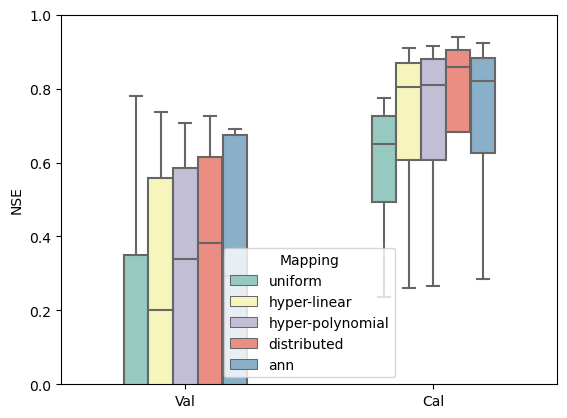

In [38]:
ax = sns.boxplot(data=df, x="cal_val", y="NSE", hue="Mapping", width=0.5, palette="Set3", showfliers = False)
ax.set(xlabel=None)
plt.ylim([0,1])
plt.show()

In [4]:
dir = "res/multisites_2/"

In [5]:
methods = ["uniform", "hyper-linear", "hyper-polynomial", "distributed", "ann"]

models = [smash.read_model_ddt(os.path.join(dir, method + ".hdf5")) for method in methods]

In [6]:
models[0]["code"]

array(['Y4624010', 'Y4604020', 'Y4615020', 'Y4615610', 'Y4615810',
       'Y4615830', 'Y4616010', 'Y4414015', 'Y6434010', 'Y6434005',
       'Y5444010', 'Y5424010', 'Y5435010', 'Y5615030', 'Y5615010',
       'Y5534030', 'Y5514010', 'Y5514040', 'Y5515410', 'Y5535410',
       'Y5325010', 'Y5005210', 'Y5032010', 'Y5106610', 'Y5112010',
       'Y5115020', 'Y5202010', 'Y5215020', 'Y5235010', 'Y5305015'],
      dtype='<U8')

In [7]:
cal_code = ["Y4624010", "Y4615020", "Y4615810", "Y5424010", "Y5005210", "Y5106610", "Y5202010", "Y5215020" ]

In [8]:
cost = []
metd = []

cal_val = []
code_catch = []

for i, code in enumerate(models[0]["code"]):

    for model, method in zip(models, methods):

        qo = model["qobs"][i]
        qs = model["qsim"][i]

        if code in cal_code:

            cal_val.append("Cal")

        else: #elif code in val_code:

            cal_val.append("Val")

        # # elif code in val2:

        # #     cal_val.append("Val2") 

        # else:
        #     continue
            
        cost.append(1 - cost_nse(qo, qs))

        metd.append(method)

        code_catch.append(code)

df = pd.DataFrame({"code": code_catch, "cal_val": cal_val, "Mapping": metd, "NSE": cost})
df


,code,cal_val,Mapping,NSE
0,Y4624010,Cal,uniform,0.393520
1,Y4624010,Cal,hyper-linear,0.751338
2,Y4624010,Cal,hyper-polynomial,0.684535
3,Y4624010,Cal,distributed,0.896241
4,Y4604020,Val,uniform,-4.534038
...,...,...,...,...
115,Y5235010,Val,distributed,-14.776629
116,Y5305015,Val,uniform,-3.536655
117,Y5305015,Val,hyper-linear,-1.859534
118,Y5305015,Val,hyper-polynomial,-28.190008


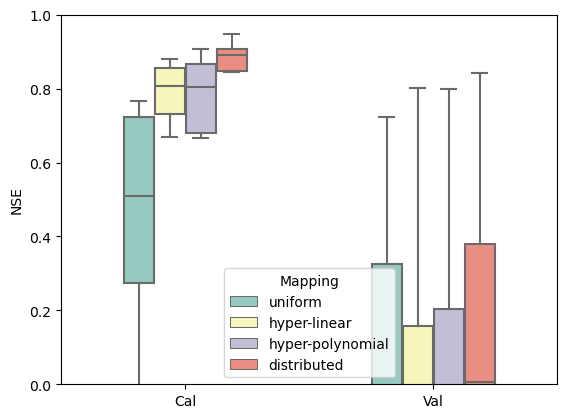

In [12]:
ax = sns.boxplot(data=df, x="cal_val", y="NSE", hue="Mapping", width=0.5, palette="Set3", showfliers = False)
ax.set(xlabel=None)
plt.ylim([0,1])
plt.show()

In [2]:
dir = "res/multisites_6/"

In [3]:
methods = ["uniform", "distributed", "hyper-linear", "hyper-polynomial", "ann", "ann2", "ann4"]

models = [smash.read_model_ddt(os.path.join(dir, method + ".hdf5")) for method in methods]

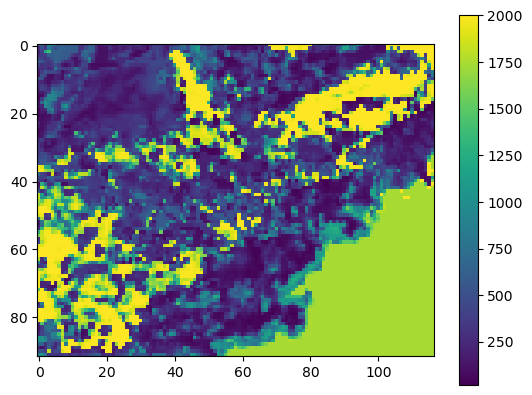

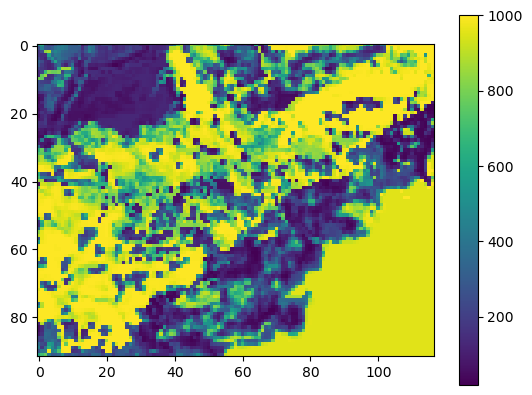

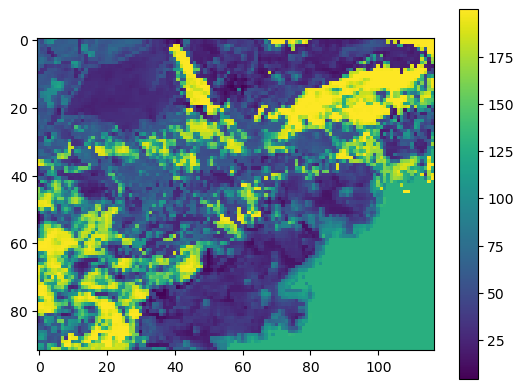

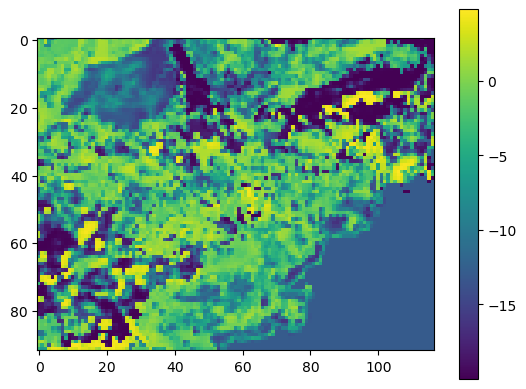

In [84]:
for p in ["cp", "cft", "lr", "exc"]:
    plt.imshow(models[-2][p])
    plt.colorbar()
    plt.show()

In [8]:
from res.multisites_6.cal_code import cal_code
cal_code

['Y4624010',
 'Y6434005',
 'Y5615030',
 'Y5325010',
 'Y5032010',
 'Y5202010',
 'Y4615020',
 'Y5424010',
 'Y5615010']

In [79]:
val_code=[
    # 'Y4615610',
    # 'Y4615810',
    # 'Y4616010',
    'Y6434010',
    'Y5435010',
    'Y5005210',
    'Y5106610',
    'Y5112010',
    # 'Y5115020',
    'Y5215020'
    ]

In [80]:
cost = []
metd = []

cal_val = []
code_catch = []

for i, code in enumerate(models[0]["code"]):

    for model, method in zip(models, methods):

        qo = model["qobs"][i]
        qs = model["qsim"][i]

        if code in cal_code:

            cal_val.append("Cal")

        elif code in val_code:

            cal_val.append("Val")

        # # elif code in val2:

        # #     cal_val.append("Val2") 

        else:
            continue
            
        cost.append(1 - cost_nse(qo, qs))

        metd.append(method)

        code_catch.append(code)

df = pd.DataFrame({"code": code_catch, "cal_val": cal_val, "Mapping": metd, "NSE": cost})
df


,code,cal_val,Mapping,NSE
0,Y4624010,Cal,uniform,0.359392
1,Y4624010,Cal,distributed,0.874250
2,Y4624010,Cal,hyper-linear,0.694059
3,Y4624010,Cal,hyper-polynomial,0.715963
4,Y4624010,Cal,ann,0.845858
...,...,...,...,...
100,Y5215020,Val,hyper-linear,0.691943
101,Y5215020,Val,hyper-polynomial,0.701543
102,Y5215020,Val,ann,0.835481
103,Y5215020,Val,ann2,0.793232


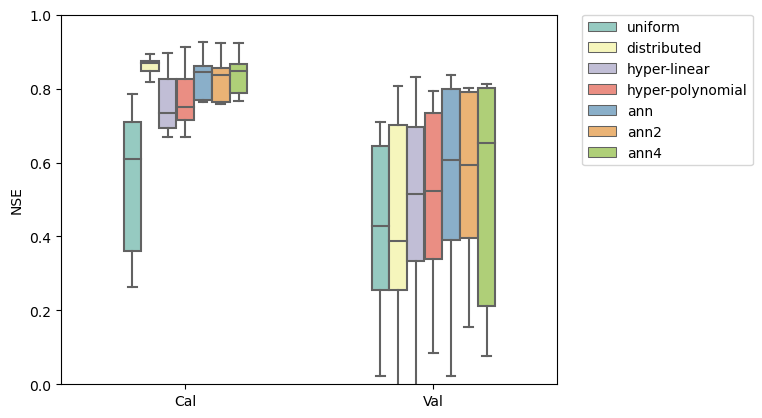

In [81]:
ax = sns.boxplot(data=df, x="cal_val", y="NSE", hue="Mapping", width=0.5, palette="Set3", showfliers = False)
ax.set(xlabel=None)
# ax2 = sns.stripplot(data=df, x="cal_val", y="NSE", hue="Mapping")
# ax2.set(xlabel=None)

plt.ylim([0,1])

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:len(models)], labels[0:len(models)], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [78]:
df[df.Mapping=="ann4"][df.cal_val=="Val"]#[df.NSE>-0.1]["code"].to_list()

/tmp/ipykernel_2731098/3739134984.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Mapping=="ann4"][df.cal_val=="Val"]#[df.NSE>-0.1]["code"].to_list()


,code,cal_val,Mapping,NSE
20,Y4615610,Val,ann4,-0.050488
27,Y6434010,Val,ann4,0.802114
48,Y5435010,Val,ann4,0.077146
76,Y5005210,Val,ann4,0.510486
90,Y5106610,Val,ann4,0.113695
97,Y5112010,Val,ann4,0.812431
111,Y5215020,Val,ann4,0.797751


In [11]:
df[df.Mapping=="distributed"][df.cal_val=="Cal"]

/tmp/ipykernel_1696058/1446808155.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Mapping=="distributed"][df.cal_val=="Cal"]


,code,cal_val,Mapping,NSE
2,Y4624010,Cal,distributed,0.623896
8,Y4615020,Cal,distributed,0.803301
23,Y4414015,Cal,distributed,0.178502
29,Y6434005,Cal,distributed,0.820533
35,Y5424010,Cal,distributed,0.873568
41,Y5615030,Cal,distributed,0.780081
44,Y5615010,Cal,distributed,0.851219
47,Y5534030,Cal,distributed,-0.236885
62,Y5325010,Cal,distributed,0.493845
68,Y5032010,Cal,distributed,0.796439


In [19]:
df[df.Mapping=="hyper-polynomial"][df.cal_val=="Cal"]

/tmp/ipykernel_3927425/919056387.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Mapping=="hyper-polynomial"][df.cal_val=="Cal"]


,code,cal_val,Mapping,NSE
0,Y4624010,Cal,hyper-polynomial,0.684535
4,Y4615020,Cal,hyper-polynomial,0.907969
14,Y4414015,Cal,hyper-polynomial,-0.562694
18,Y6434005,Cal,hyper-polynomial,0.355211
22,Y5424010,Cal,hyper-polynomial,0.830189
26,Y5615030,Cal,hyper-polynomial,0.284986
28,Y5615010,Cal,hyper-polynomial,0.375758
30,Y5534030,Cal,hyper-polynomial,-0.787548
40,Y5325010,Cal,hyper-polynomial,0.715527
44,Y5032010,Cal,hyper-polynomial,0.120103


In [20]:
df[df.Mapping=="distributed"][df.cal_val=="Cal"]

/tmp/ipykernel_3927425/1446808155.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Mapping=="distributed"][df.cal_val=="Cal"]


,code,cal_val,Mapping,NSE
1,Y4624010,Cal,distributed,0.896241
5,Y4615020,Cal,distributed,0.942280
15,Y4414015,Cal,distributed,-4.061255
19,Y6434005,Cal,distributed,0.612490
23,Y5424010,Cal,distributed,0.894705
27,Y5615030,Cal,distributed,0.062730
29,Y5615010,Cal,distributed,0.118733
31,Y5534030,Cal,distributed,-3.903968
41,Y5325010,Cal,distributed,0.400953
45,Y5032010,Cal,distributed,0.495933


In [11]:
from res.multisites_6.cal_code import cal_code
cal_code

['Y4624010',
 'Y6434005',
 'Y5615030',
 'Y5325010',
 'Y5032010',
 'Y5202010',
 'Y4615020',
 'Y5424010',
 'Y5615010']

In [90]:
dff = pd.read_csv("infoBV/MedEst/info_bv.csv")
# dff = dff[dff.Code_BV.isin(cal_code+val_code)]
# dff

In [91]:
setup, mesh = load_data(dff)

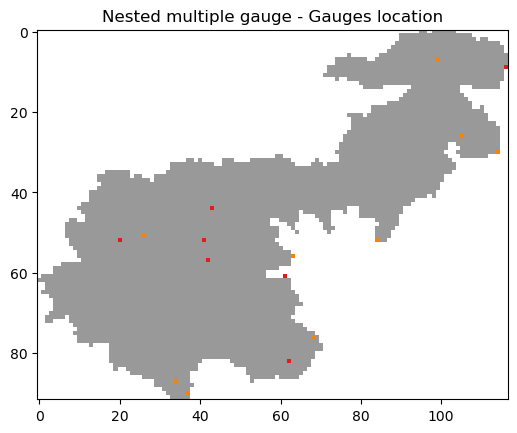

In [95]:
canvas = np.zeros(shape=mesh["flwdir"].shape)

canvas = np.where(mesh["active_cell"] == 0, np.nan, canvas)

for pos, code in zip(mesh["gauge_pos"], mesh["code"]):

    if code in cal_code:

        canvas[tuple(pos)] = 1

    if code in val_code:

        canvas[tuple(pos)] = 2

plt.imshow(canvas, cmap="Set1_r")

plt.title("Nested multiple gauge - Gauges location")

plt.show()